# 50 Year vs 15 Year Module

Comparison case using the functions in CE-MFC to compare 15 year module reliability vs 50 year module reliability.

In [28]:
import main
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_excel('baselines\\baseline_US_glass.xlsx', index_col='Year')
df2 = df.copy()

In [30]:
df = main.calculateMassFlow(df)
df['Reliability_t50_[years]'] = 50
df['Reliability_t90_[years]'] = 60

In [31]:
# df2 = main.sens_lifetime(df2, 19.5, 2025)
df2['Reliability_t50_[years]'] = 8
df2['Reliability_t90_[years]'] = 15
df2 = main.calculateMassFlow(df2)

C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\CircularEconomy-MassFlowCalculator\main.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['EoL_Waste_Glass'][df.index[0]] )
C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\CircularEconomy-MassFlowCalculator\main.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['EoL_Waste_Glass'][year] )


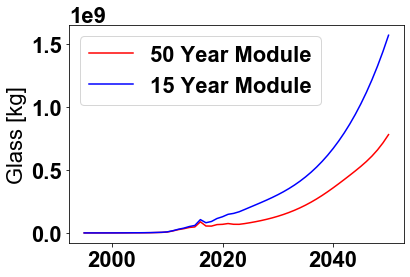

In [34]:
plt.plot(df['Total_Landfilled_Waste'],'r', label='50 Year Module')
plt.plot(df2['Total_Landfilled_Waste'],'b', label='15 Year Module')
plt.ylabel("Glass [kg]")
plt.legend()